In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv('ken.csv')

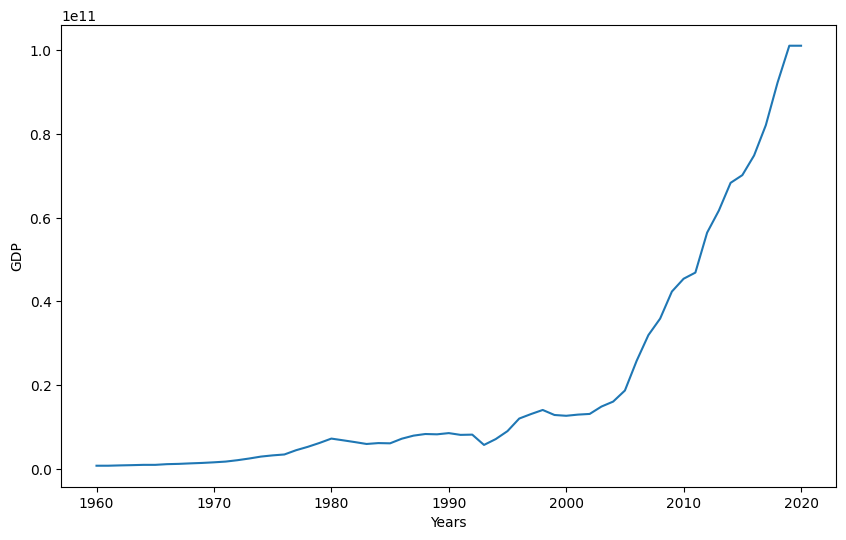

In [3]:
indexedDataset = dataset.set_index(['Year'])
plt.xlabel("Years")
plt.ylabel("GDP")
plt.plot(indexedDataset)

In [4]:
#Rolling stats
rolmean = indexedDataset.rolling(window=5).mean()
rolstd = indexedDataset.rolling(window=5).std()
print(rolmean,rolstd)

               GDP
Year              
1960           NaN
1961           NaN
1962           NaN
1963           NaN
1964  8.755370e+08
...            ...
2016  6.625789e+10
2017  7.138571e+10
2018  7.749201e+10
2019  8.403486e+10
2020  9.021078e+10

[61 rows x 1 columns]                GDP
Year              
1960           NaN
1961           NaN
1962           NaN
1963           NaN
1964  8.911505e+07
...            ...
2016  7.254933e+09
2017  7.595447e+09
2018  9.789267e+09
2019  1.262087e+10
2020  1.162583e+10

[61 rows x 1 columns]


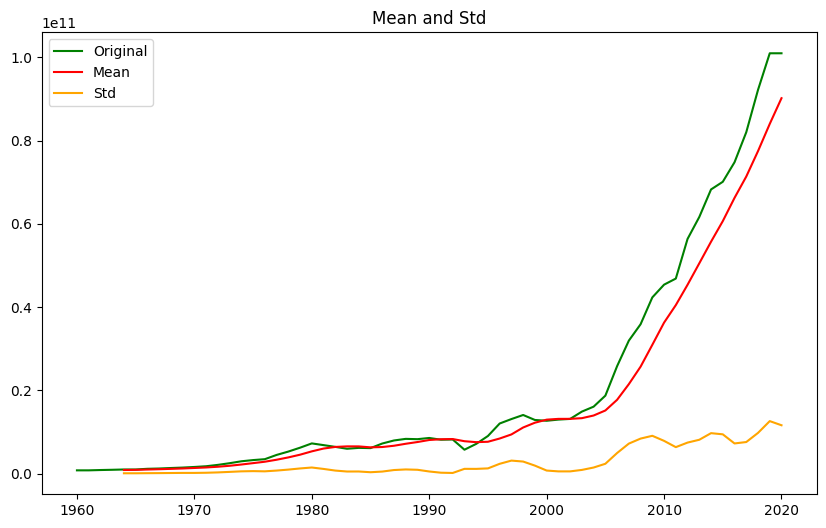

In [5]:
#Visual rolling
orig = plt.plot(indexedDataset, color = 'green', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Mean')
std = plt.plot(rolstd, color = 'orange', label = 'Std')
plt.legend(loc = 'best')
plt.title('Mean and Std')
plt.show(block=False)

In [6]:
#ADF test
# if test stats > Critical Value, accept null hypothesis
#i.e non stationary

from statsmodels.tsa.stattools import adfuller

print('Results...')
dftest = adfuller(indexedDataset['GDP'], autolag ='AIC')
dfoutput = pd.Series(dftest[0:4], index =['Test stats','p-value','lags-used','No. of observations'])
for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
print(dfoutput)



Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


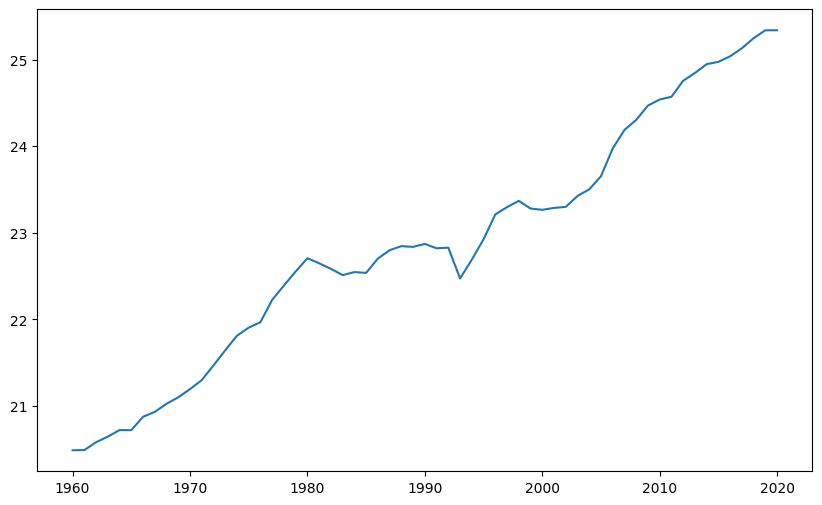

In [7]:
#Trend estimate
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

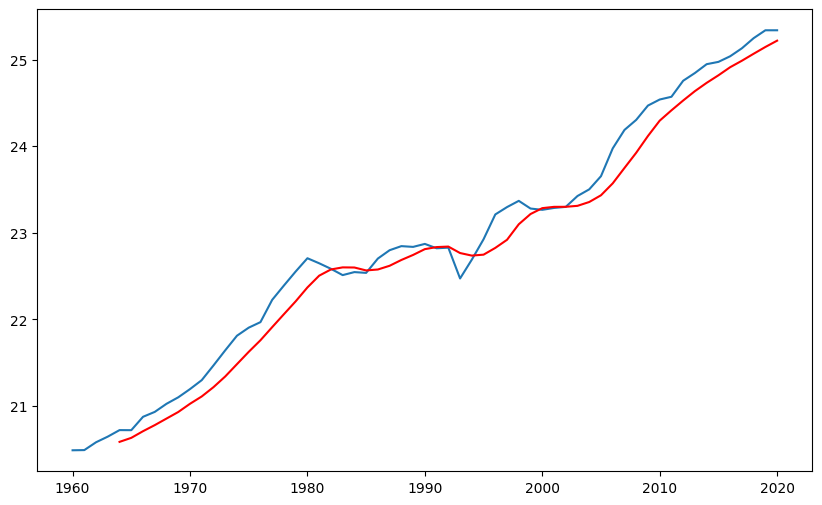

In [8]:
movingAverage = indexedDataset_logScale.rolling(window = 5).mean()
movingSTD = indexedDataset_logScale.rolling(window = 5).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color ='red')


In [9]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage

#drop Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace =True)
datasetLogScaleMinusMovingAverage.head()

,GDP
Year,
1964,0.135764
1965,0.088515
1966,0.166048
1967,0.152726
1968,0.170419


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #rolling stats
    movingAverage = timeseries.rolling(window =5).mean()
    movingSTD = timeseries.rolling(window =5).std()
    
    #Plot rolling stats
    orig = plt.plot(timeseries, color = 'green', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Mean')
    std = plt.plot(movingSTD , color = 'orange', label = 'Std')
    plt.legend(loc = 'best')
    plt.title('Mean and Std')
    plt.show(block=False)
    
    #ADF test
    print('Results...')
    dftest = adfuller(indexedDataset['GDP'], autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index =['Test stats','p-value','lags-used','No. of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)
    

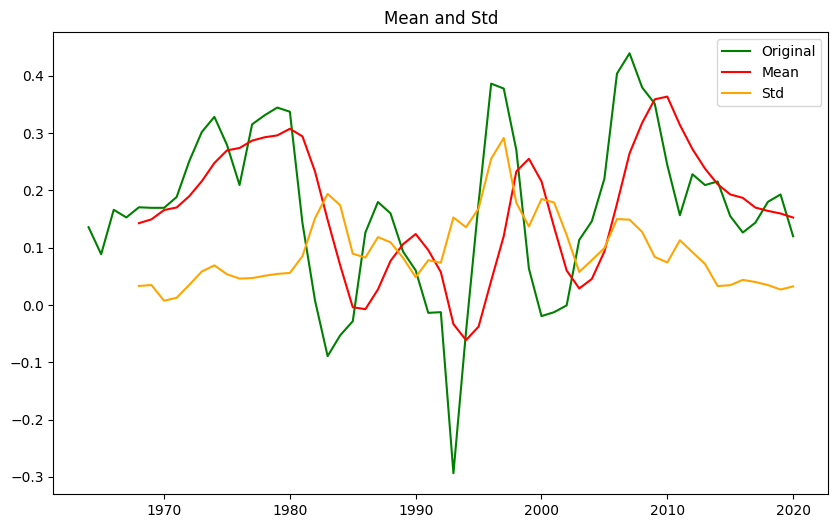

Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


In [11]:
test_stationarity(datasetLogScaleMinusMovingAverage)
#H0 is still true

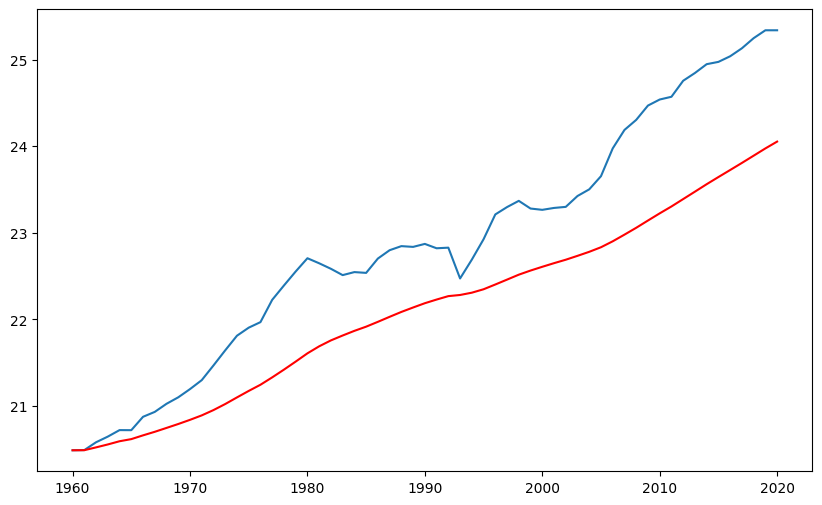

In [12]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

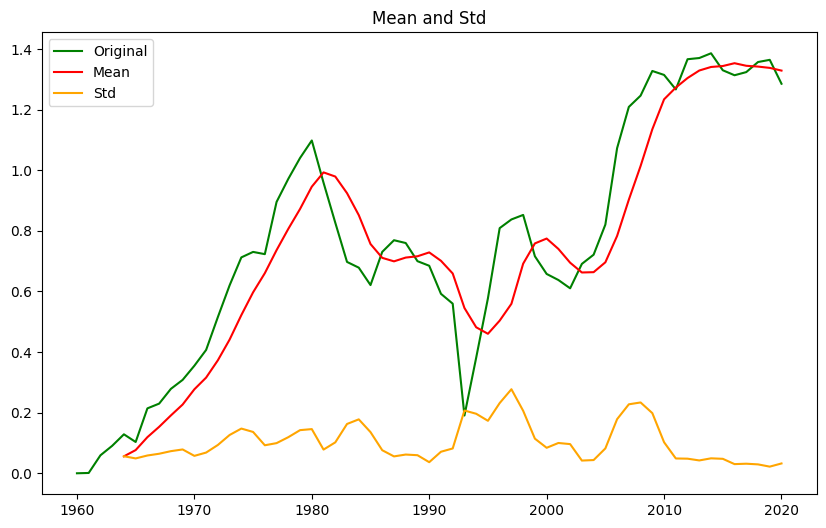

Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


In [13]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

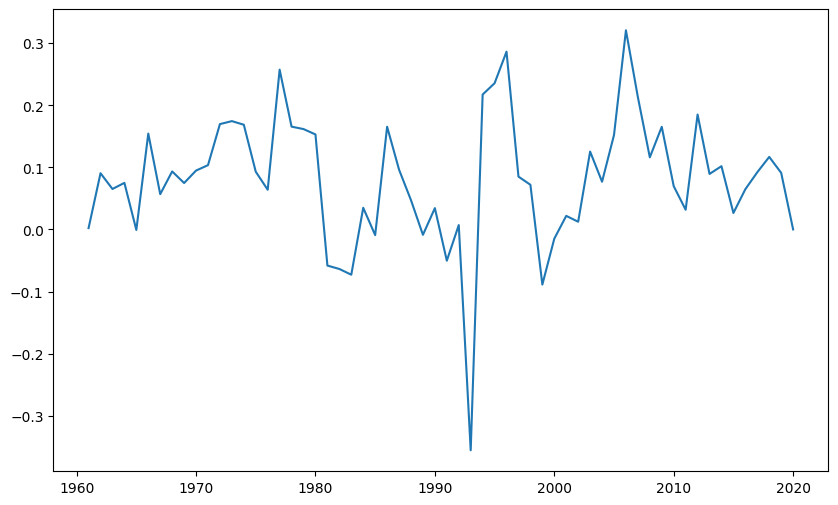

In [14]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

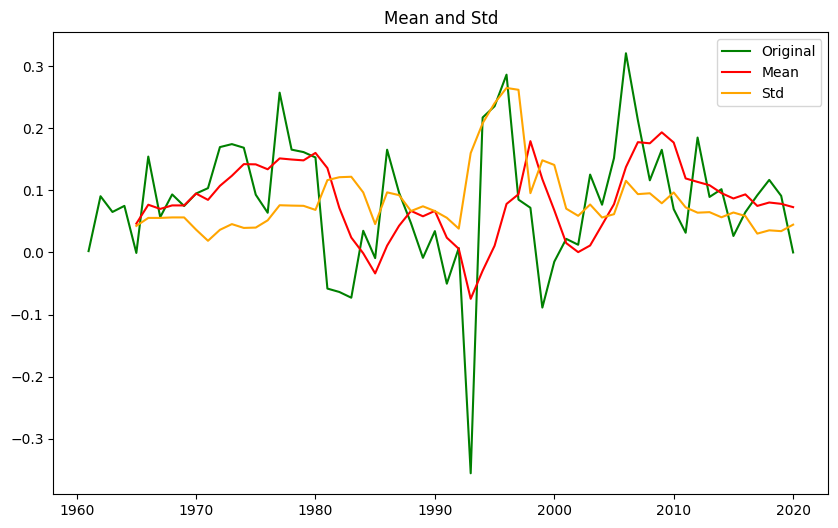

Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


In [15]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

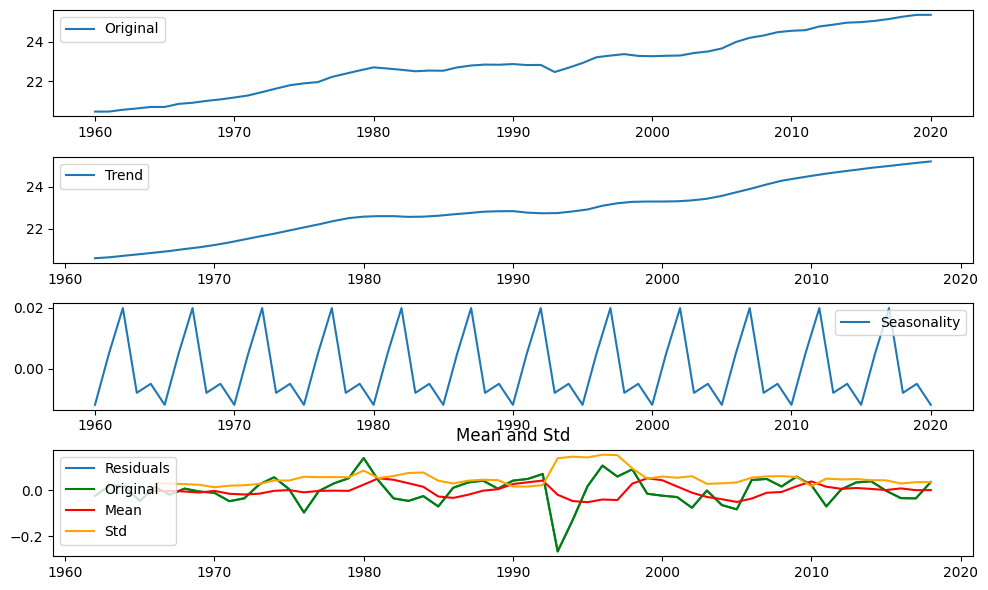

Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,period = 5 )

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label ='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

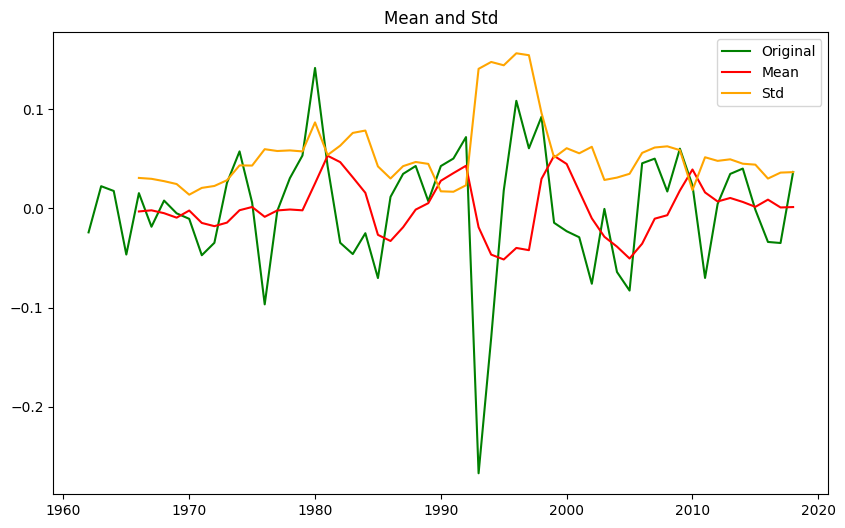

Results...
Test stats              0.483724
p-value                 0.984370
lags-used               9.000000
No. of observations    51.000000
Critical Value(1%)     -3.565624
Critical Value(5%)     -2.920142
Critical Value(10%)    -2.598015
dtype: float64


In [19]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

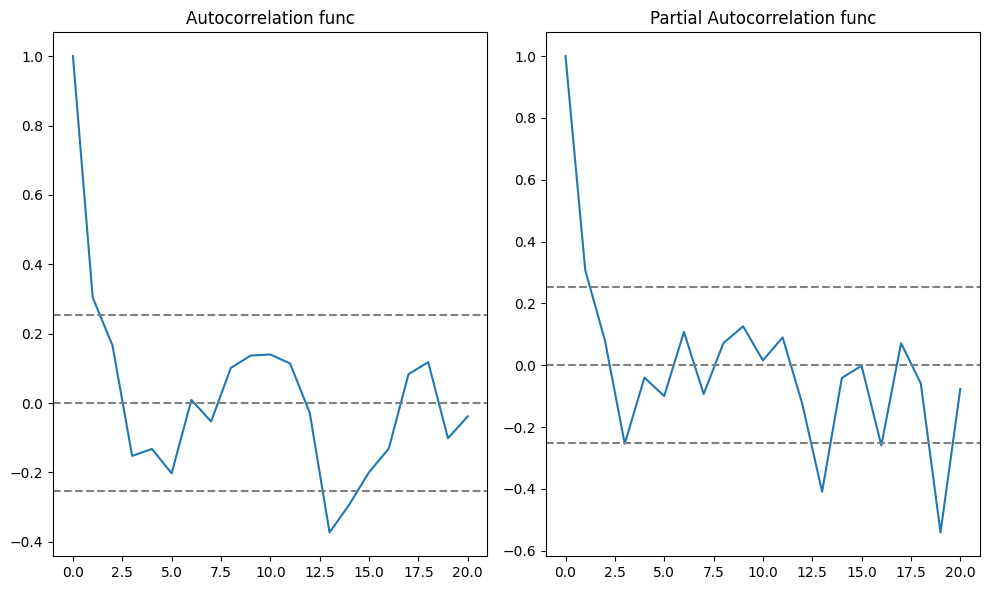

In [20]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags =20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#visual Acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation func')

#Visual PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation func')
plt.tight_layout()


C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR model


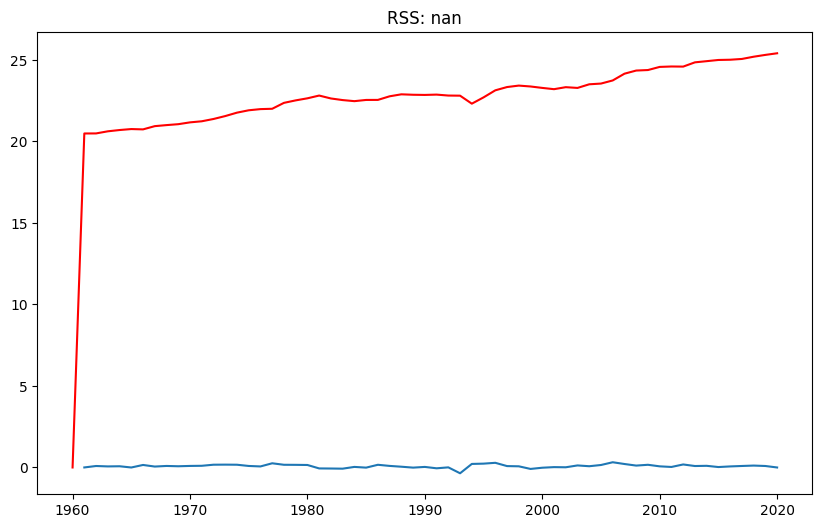

In [24]:
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['GDP'])**2))
print('AR model')

C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR model


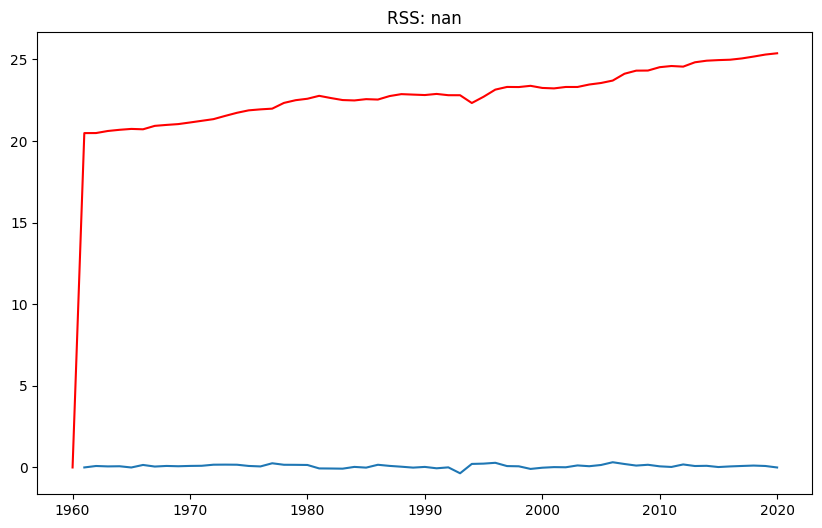

In [26]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['GDP'])**2))
print('AR model')

C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

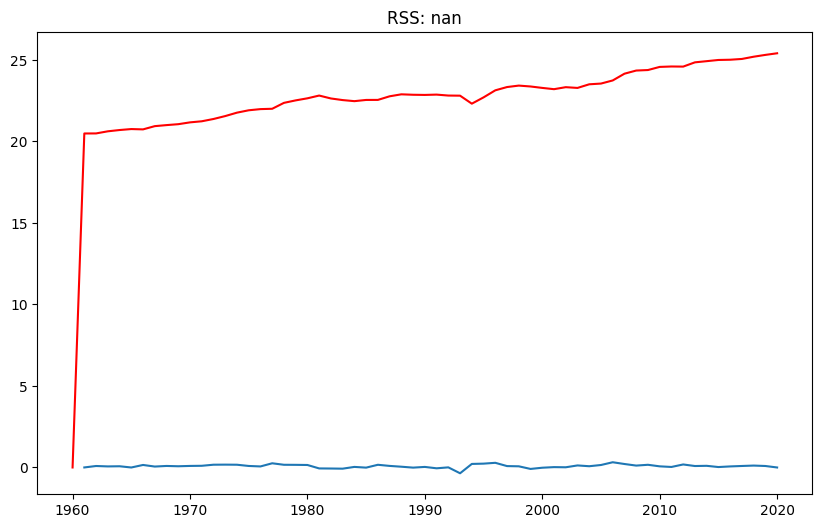

In [27]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['GDP'])**2))


In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Year
1960     0.000000
1961    20.489144
1962    20.492485
1963    20.621950
1964    20.700962
dtype: float64

In [29]:
#Conversion to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Year
1960     0.000000
1961    20.489144
1962    40.981629
1963    61.603579
1964    82.304542
dtype: float64

In [34]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['GDP'].iloc[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Year
1960     20.489144
1961     40.978288
1962     61.470773
1963     82.092723
1964    102.793686
dtype: float64

C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


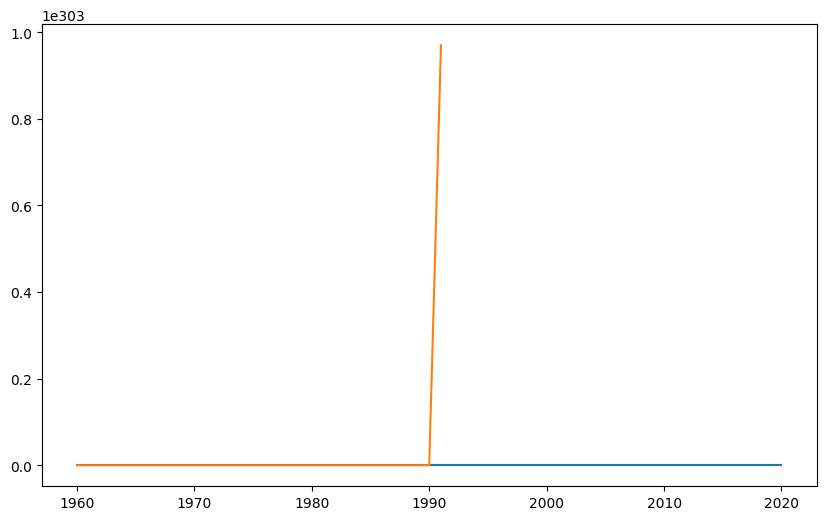

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


C:\Users\root\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


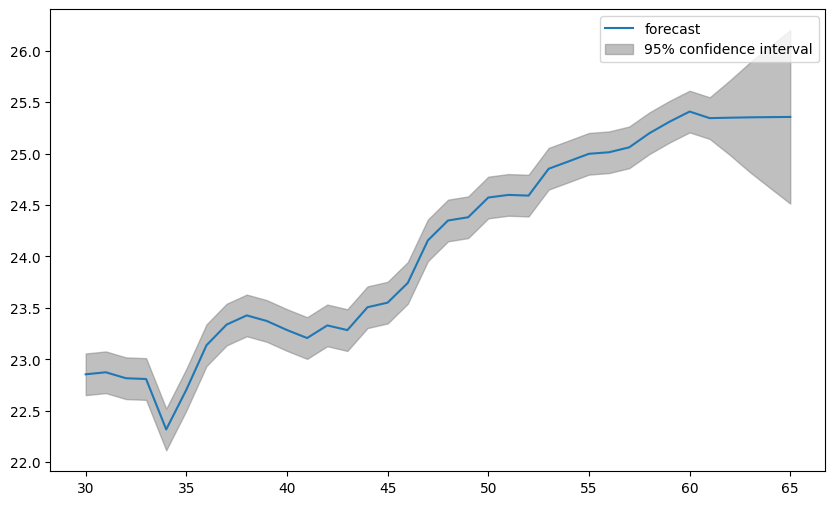

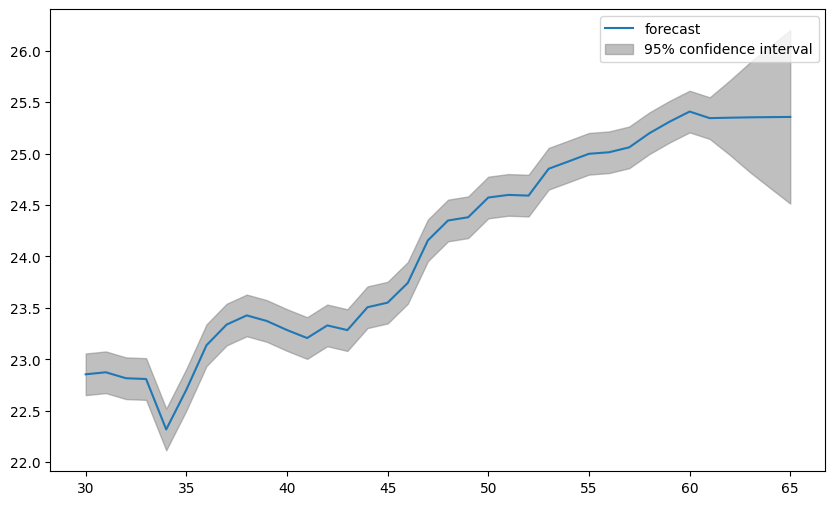

In [59]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results_ARIMA,30,65)
#results_ARIMA.plot_predict()